In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from pandas_datareader import DataReader

/Users/fujiiryou/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
from datetime import datetime

In [4]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [5]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [6]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    
# 文字列のAAPLにデータフレームのデータを格納している

### globals とは
元のデータ型を無視して、新しいデータ型としてデータを格納することができる

In [7]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-11,196.000000,193.600006,194.860001,194.809998,26932900.0,192.512451
2019-06-12,195.970001,193.389999,193.949997,194.190002,18221800.0,191.899780
2019-06-13,196.789993,193.600006,194.699997,194.149994,21674600.0,191.860229
2019-06-14,193.589996,190.300003,191.550003,192.740005,18761500.0,190.466873
2019-06-17,194.960007,192.169998,192.899994,193.889999,14669100.0,191.603317
...,...,...,...,...,...,...
2020-06-05,331.750000,323.230011,323.350006,331.500000,34312600.0,331.500000
2020-06-08,333.600006,327.320007,330.250000,333.459991,23913600.0,333.459991
2020-06-09,345.609985,332.010010,332.140015,343.989990,36928100.0,343.989990


In [8]:
AAPL.info()

# データの外観を把握、欠損値はあるか、データは均一に揃っているか等を確認する

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-06-11 to 2020-06-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


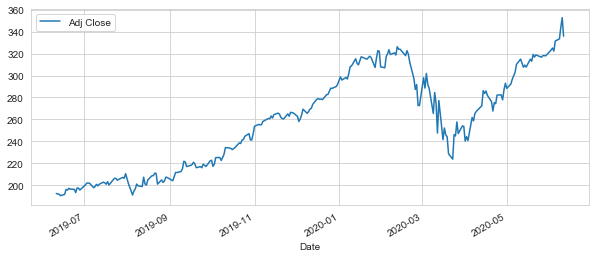

In [10]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

#  legend は凡例の表示場所を選択できる、今回は株価が右上に表示されるので、左にしている

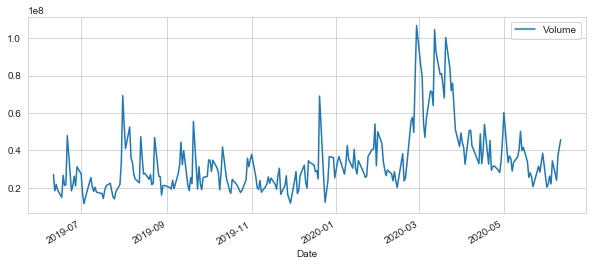

In [10]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [11]:
ma_day = [10,20,50,200]

In [12]:
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

In [13]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50,MA 200
Date,,,,,,,,,,
2019-06-11,196.000000,193.600006,194.860001,194.809998,26932900.0,192.512451,NaN,NaN,NaN,NaN
2019-06-12,195.970001,193.389999,193.949997,194.190002,18221800.0,191.899780,NaN,NaN,NaN,NaN
2019-06-13,196.789993,193.600006,194.699997,194.149994,21674600.0,191.860229,NaN,NaN,NaN,NaN
2019-06-14,193.589996,190.300003,191.550003,192.740005,18761500.0,190.466873,NaN,NaN,NaN,NaN
2019-06-17,194.960007,192.169998,192.899994,193.889999,14669100.0,191.603317,NaN,NaN,NaN,NaN


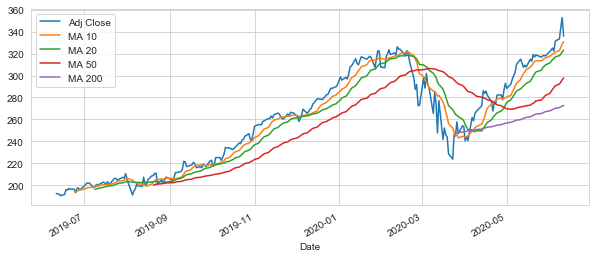

In [14]:
AAPL[['Adj Close','MA 10','MA 20','MA 50','MA 200']].plot(subplots=False,figsize=(10,4))

In [15]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

#変化率を取得する

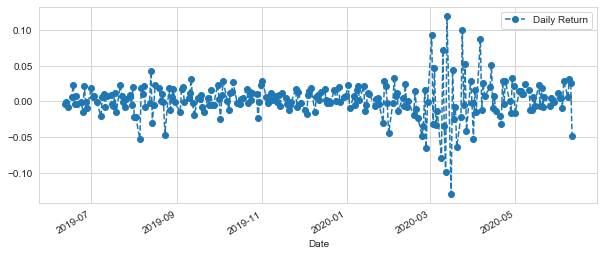

In [16]:
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

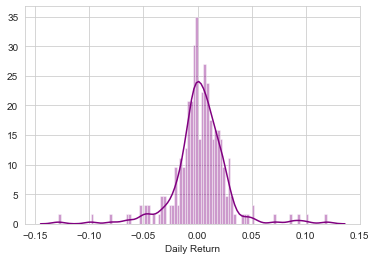

In [17]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

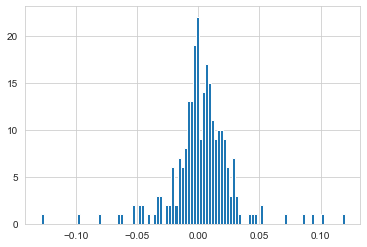

In [18]:
AAPL['Daily Return'].hist(bins=100)

In [19]:
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [20]:
tech_rets = closing_df.pct_change()

# 各株価の変化率を取得する

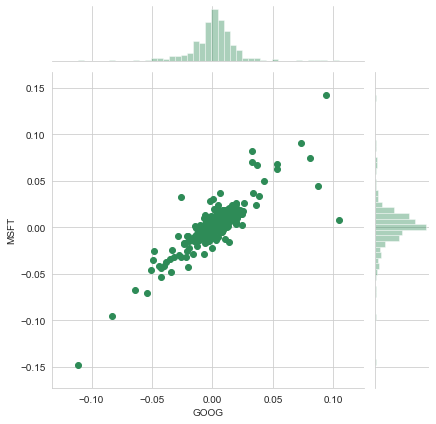

In [21]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='seagreen')

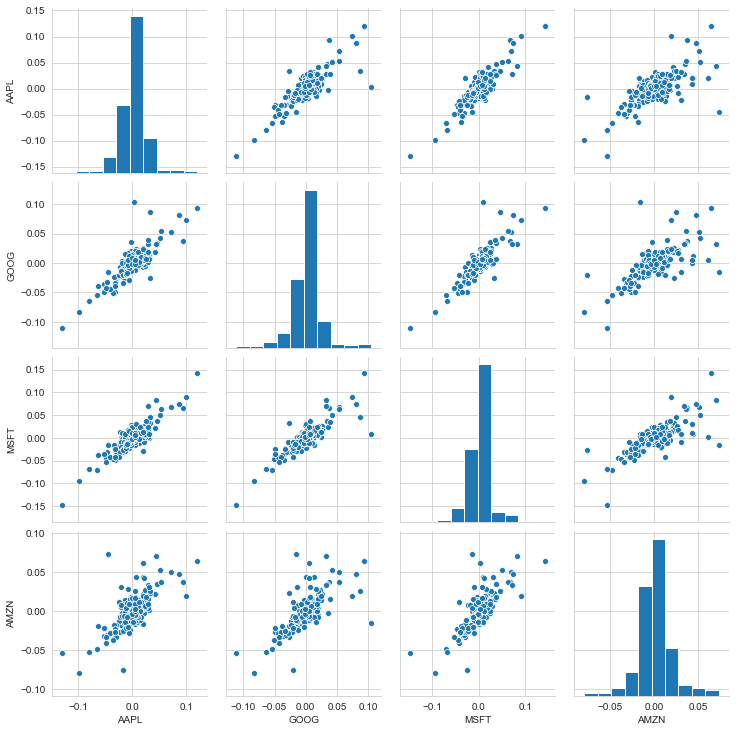

In [22]:
sns.pairplot(tech_rets.dropna())

# 対角線上にはヒストグラム

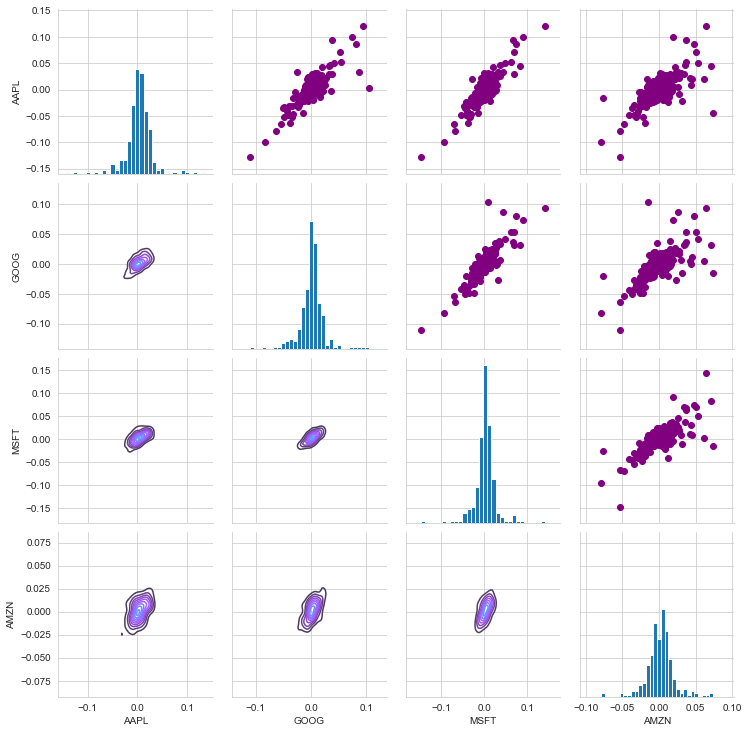

In [23]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

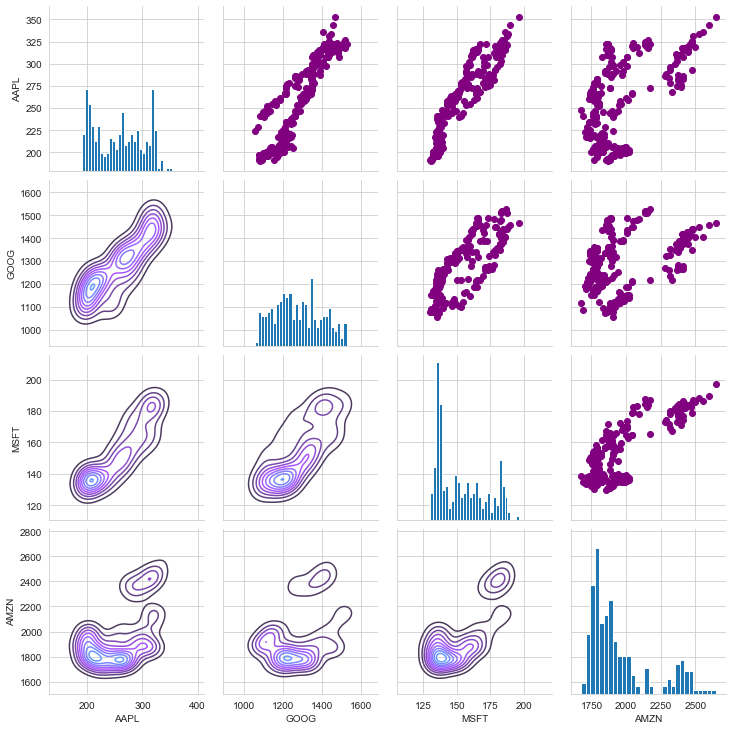

In [24]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

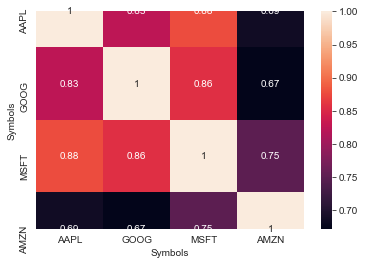

In [25]:
sns.heatmap(tech_rets.corr(),annot=True)

# 相関係数を取得する

## リスク可視化

In [26]:
rets = tech_rets.dropna()

In [27]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-06-12,-0.003183,-0.001567,-0.004618,-0.004496
2019-06-13,-0.000206,0.010900,0.006312,0.008074
2019-06-14,-0.007262,-0.003141,0.000983,-0.000337
2019-06-17,0.005967,0.006588,0.003020,0.008750
2019-06-18,0.023518,0.010160,0.017388,0.008133


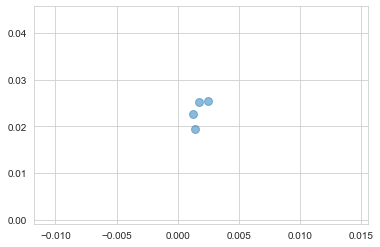

In [28]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s= np.pi*20)

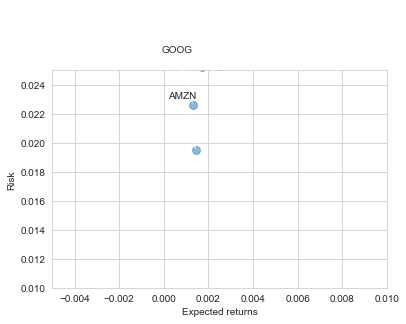

In [34]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s= np.pi*20)
plt.ylim([0.01,0.025])
plt.xlim([-0.005,0.01])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label , xy=(x,y), xytext=(0,50),
    textcoords = 'offset points', ha = 'right', va= 'bottom',
    arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3'))

## バリューアットリスク

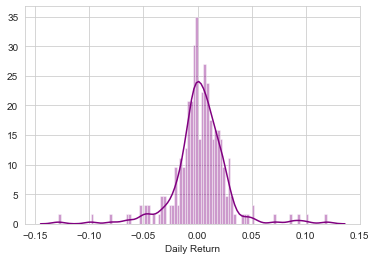

In [35]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100, color='purple')

In [37]:
rets['AAPL'].quantile(0.05)

# 小さい方から5%

-0.03421546526840809

In [38]:
# ブラウン運動モデル ランダムウォークを表現する手法
# 乱数を使ったシュミレーションをモンテカルロ法という

In [39]:
days = 365
dt = 1/365
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [46]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc = mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] =price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    return price

# np.random.normal() 正規分布からランダムな値を取得するための関数　

In [47]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-11,1101.989990,1077.603027,1093.979980,1078.719971,1436700,1078.719971
2019-06-12,1080.930054,1067.540039,1078.000000,1077.030029,1061000,1077.030029
2019-06-13,1094.170044,1080.150024,1083.640015,1088.770020,1057700,1088.770020
2019-06-14,1092.689941,1080.171997,1086.420044,1085.349976,1111500,1085.349976
2019-06-17,1099.180054,1086.280029,1086.280029,1092.500000,941600,1092.500000


Text(0.5, 1.0, 'Monte Carlo Analysis')

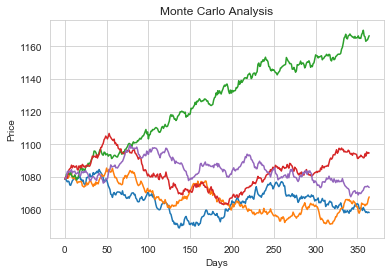

In [49]:
start_price = GOOG.iloc[0,5]

for run in range(5):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis')

In [52]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

(array([1., 0., 1., ..., 0., 0., 1.]),
 array([ 996.08013163,  996.98417726,  997.88822288, ..., 1175.08116513,
        1175.98521076, 1176.88925638]),
 <a list of 200 Patch objects>)

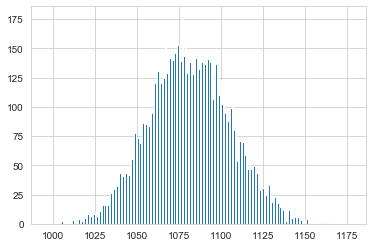

In [54]:
plt.hist(simulations,bins=200)

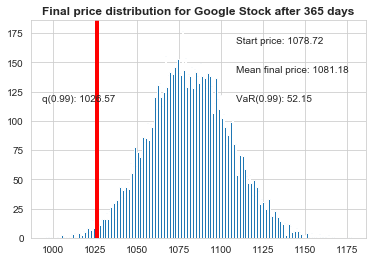

In [56]:
# 最終的な株価のヒストグラムを表示します。
plt.hist(simulations,bins=200)

# 1パーセンタイルの位置を設定します。
q = np.percentile(simulations, 1)

# プロットに追加的な情報を載せます。

# 最初の株価
plt.figtext(0.6, 0.8, s="Start price: {:0.2f}".format(start_price))
# 最終的な株価の平均値
plt.figtext(0.6, 0.7, "Mean final price: {:0.2f}".format(simulations.mean()))

# Value at Risk (信頼区間99%）
plt.figtext(0.6, 0.6, "VaR(0.99): {:0.2f}".format(start_price - q))

# 1パーセンタイル
plt.figtext(0.15, 0.6, "q(0.99): {:0.2f}".format(q))

# 1% クォンタイルに線を描きます
plt.axvline(x=q, linewidth=4, color='r')

# タイトル
plt.title("Final price distribution for Google Stock after {} days".format(days), weight='bold');